In [2]:
from scipy import stats as st
import numpy as np
size=100
lev=300
img=st.poisson(lev).rvs(size=size*size).reshape(size,size)

In [6]:
img22=(img[1:,1:]+img[1:,:-1]+img[:-1,1:]+img[:-1,:-1])/4

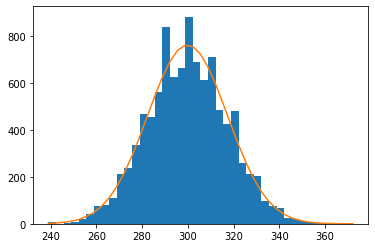

In [22]:
from matplotlib import pyplot as pl
fcnt=pl.hist(img.ravel(),40)
pee=st.norm.fit(img.ravel())
sx=fcnt[1]
dx=sx[1]-sx[0]
pl.plot(sx,st.norm(*pee).pdf(sx)*size*size*dx)

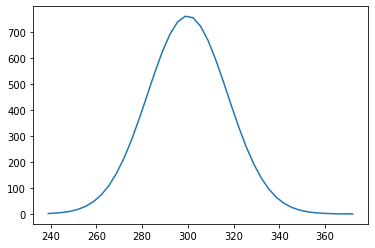

In [21]:
sx=fcnt[1]
dx=sx[1]-sx[0]
pl.plot(sx,st.norm(*pee).pdf(sx)*size*size*dx)

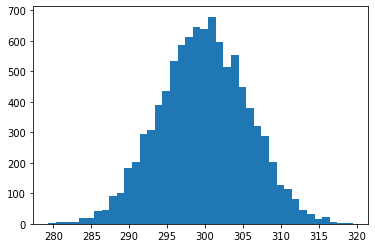

In [35]:
from scipy import ndimage as nd
wee=nd.convolve1d(nd.convolve1d(img,[1,1,1],axis=1),[1,1,1],axis=0)/9
img33=wee[1:-1,1:-1]
fcnt=pl.hist(img33.ravel(),40)


In [36]:
np.std(img22.ravel()),np.sqrt(lev)/2

(8.6519588794746, 8.660254037844387)

In [39]:
nsig=5
sum(img33.ravel()-lev>nsig*np.sqrt(lev)/3)

0

In [44]:
size=4000
st.norm().isf(1/(size-1)**2*0.1)

5.692677432698328

0.9875390624968041

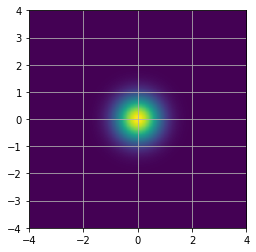

In [62]:
import numpy as np
dx,dy=0.05,0.05
psf=3*0.19
pixs=1.75
fsiz=4
npix,npiy=int(2*fsiz/dx),int(2*fsiz/dy)
mx,my=np.mgrid[-fsiz:fsiz:npix*1j,-fsiz:fsiz:npiy*1j]
zpsf=np.exp(-(mx**2+my**2)/2/psf**2)/(2*np.pi)/psf**2*dx*dy
from matplotlib import pyplot as pl
pl.imshow(zpsf,extent=[-fsiz,fsiz,-fsiz,fsiz])
pl.grid()
zpsf.sum()

In [63]:
1/1066*36*18/np.pi

0.19349418972523114

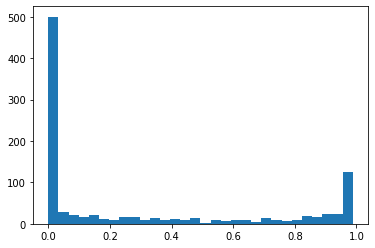

In [64]:
from numpy import random as rd 
stab=3.5
niter=1000
sx=rd.randn(niter)*stab
sy=rd.randn(niter)*stab
foread=3
dchipx,dchipy=int(foread*pixs/dx),int(foread*pixs/dy)
cx,cy=len(mx)//2,len(mx[0])//2

drang=lambda c,s,d:[max(0,c-s),min(d,c+s)]
sumsub=lambda im,px,py:im[px[0]:px[1],py[0]:py[1]].sum()

allsim=[sumsub(zpsf,drang(int(cx-sx[j]/dx),dchipx//2,2*cx),drang(int(cy-sy[j]/dy),dchipy//2,2*cy)) for j in range(niter)]
pl.hist(allsim,30);

array([0.00305814, 0.45745879, 0.80126382])

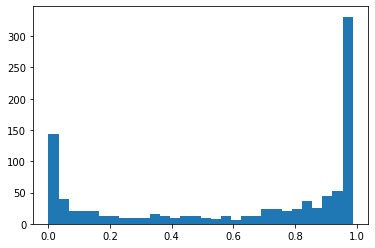

In [66]:
#pl.hist(np.sqrt(sx**2+sy**2),30);
def collef(stab=2.5,foread=3,niter=1000,ptiles=[90,66,50]):
    '''foread: how many pixels to readout
    stab: RMS of position fluctuation
    '''
    dchipx,dchipy=int(foread*pixs/dx),int(foread*pixs/dy)
    sx=rd.randn(niter)*stab
    sy=rd.randn(niter)*stab
    allsim2=[sumsub(zpsf,drang(int(cx-sx[j]/dx),dchipx//2,2*cx),drang(int(cy-sy[j]/dy),dchipy//2,2*cy)) for j in range(niter)]
    pl.hist(allsim2,30);
    return np.percentile(allsim2,[100-a for a in ptiles])
collef(2)

array([0.00895373, 0.12875709, 0.26617584])

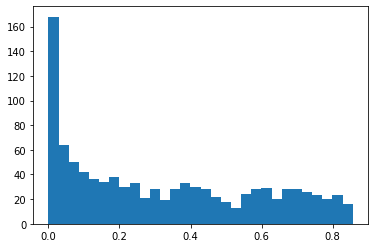

In [58]:
collef(2,2)